<a href="https://colab.research.google.com/github/evaldoflorestal/InventarioFlorestal/blob/main/Analise_de_inventario_Florestal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introdução**

Este é um estudo de análise de dados obtidos por inventários florestais em um reflorestamento de teca (Tectona grandis). Para este estudo utilizou-se Python e suas bibliotecas: Pandas, Seaborn, Matplotlib e Numpy.

O ojetivo principal é utilizar a linguagem python e suas bibliotecas como ferramentas para avaliações em reflorestamentos.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline

In [ ]:
inventario = pd.read_excel('/content/INVENTÁRIO FLORESTAL.xlsx')
inventario

,Pais,Projeto,Sitio,Data_plantio,Data_medicao,Idade_meses,Idade_anos,Area_talhao_ha,ID_talhao,N_parcelas,...,ALT_tot_m,ALT_com_m,IMA_ALT_m,Ind_Sitio_m,Area_Basal,ICA_Are_Basal_ha,VOL_tot_m3ha,ICA_Vol_tot_m3ha,IMA_Vol_tot_m3ha,VOL_Talhao_m3
0,BR,EBF,1,2011-03-04,2018-09-26,90,7.5,23.95,001,8,...,6.9,5.1,0.9,9.6,4.4,NaN,14.6,NaN,1.9,348.6
1,BR,EBF,1,2011-03-04,2019-09-17,102,8.5,23.95,001,15,...,7.2,NaN,0.8,8.9,5.2,0.6,17.1,2.0,2.0,408.8
2,BR,EBF,1,2011-03-04,2020-09-30,114,9.5,23.95,001,15,...,8.3,NaN,0.9,9.3,6.3,1.1,24.3,7.2,2.6,581.5
3,BR,EBF,1,2011-03-04,2021-09-30,126,10.5,23.95,001,15,...,9.1,NaN,0.9,9.8,3.9,0.3,16.2,2.6,1.5,388.9
4,BR,EBF,1,2011-02-25,2018-09-26,91,7.6,20.03,002,7,...,8.1,6.2,1.1,10.4,6.6,NaN,24.8,NaN,3.3,495.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,BR,EBF,1,2011-03-31,2021-09-30,126,10.5,6.83,29B,2,...,13.3,NaN,1.3,13.5,12.8,1.1,76.4,13.2,7.3,521.6
95,BR,EBF,1,2011-03-31,2018-09-26,89,7.4,10.13,29C,4,...,10.7,8.6,1.4,13.5,13.1,NaN,64.8,NaN,8.7,656.0
96,BR,EBF,1,2011-03-31,2019-09-17,101,8.4,10.13,29C,9,...,12.4,NaN,1.5,14.1,14.2,1.6,80.2,17.8,9.5,812.2
97,BR,EBF,1,2011-03-31,2020-09-30,114,9.5,10.13,29C,9,...,12.8,NaN,1.3,14.3,14.6,0.3,86.2,5.6,9.1,873.4


Procurou-se observar as informações da base de dados (inventário) e assim constatar os tipos de dados a serem estudados

In [ ]:
inventario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pais               99 non-null     object        
 1   Projeto            99 non-null     object        
 2   Sitio              99 non-null     int64         
 3   Data_plantio       99 non-null     datetime64[ns]
 4   Data_medicao       99 non-null     datetime64[ns]
 5   Idade_meses        99 non-null     int64         
 6   Idade_anos         99 non-null     float64       
 7   Area_talhao_ha     99 non-null     float64       
 8   ID_talhao          99 non-null     object        
 9   N_parcelas         99 non-null     int64         
 10  Especie            99 non-null     object        
 11  Arv_iniciais       99 non-null     int64         
 12  Arv_vivas          99 non-null     int64         
 13  Sobrevivencia (%)  99 non-null     int64         
 14  Arv_ha      

Baseados nas informações, procurou-se entender as medições consecutivas por datas de medições.
No ano de 2018 o reflorestamento teve 25 medições (em 25 talhões), sendo que algumas destes foram realizadas em datas distintas.

Posteriormente no ano de 2019 e 2020, foram medidos 25 talhões. No ano de 2021 foram medidos apenas 24 talhões e não 25 como nos anos anteiores.

In [ ]:
#Contabilizando as mensurações anuais dos talhões
qtd_idade = inventario['Data_medicao'].value_counts()
qtd_idade

2019-09-17    25
2020-09-30    25
2018-09-26    24
2021-09-30    24
2018-08-10     1
Name: Data_medicao, dtype: int64

Conforme resultado apresentado acima, procurou-se entender qual talhão foi mensurado unicamente na data de 10-08-2018. Constatou-se que o **Talhão 14B** foi o início de toda mensuração na data mencionada.

As mensurações nos demais talhões se deram no mês posterior (mês 09).

In [ ]:
tb_idade = inventario[['Data_medicao','ID_talhao','Area_talhao_ha','Idade_anos','DAP_med_cm','VOL_tot_m3ha','ALT_tot_m']]
inventario2018_1 = tb_idade[tb_idade["Data_medicao"] == "2018-08-10"]
inventario2018_1


,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
48,2018-08-10,14B,5.3,7.3,14.3,44.7,10.7


A partir das sequencias de mensurações apresentadas no item [4] procurou-se entender qual talhão não foi mensurado no ano de 2021 uma vez que também apresentou 24 mensurações e nenhuma outra data distinta, e como resposta, detectou-se que o talhão 14B teve apenas 3 medições consecutivas (*conforme apresentam os resultados no código abaixo*), dessa forma, diferindo dos demais com 4 mensurações.

Pode supor que: A equipe não entrou no talhão para mensurar, o talhão já não existe mais por razões de corte final ou até mesmo por razões de que a empresa não quer levar adiante a condução do referido talhão e quer destinar a área para outra atividade.

In [ ]:
num_med_talhao = inventario.ID_talhao.value_counts()
num_med_talhao.sort_values()

14B    3
005    4
013    4
018    4
019    4
028    4
030    4
031    4
032    4
033    4
002    4
003    4
001    4
22B    4
25A    4
25B    4
25C    4
26     4
27A    4
27B    4
29A    4
29B    4
20B    4
21B    4
29C    4
Name: ID_talhao, dtype: int64

Com isso, buscamos separar as mensurações do ano de 2021 e realizar uma análise.

In [ ]:
tb_idade = inventario[['Data_medicao','ID_talhao','Area_talhao_ha','Idade_anos','DAP_med_cm','VOL_tot_m3ha','ALT_tot_m']]
inventario2021 = tb_idade[tb_idade["Data_medicao"] == "2021-09-30"]
inventario2021

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
3,2021-09-30,001,23.95,10.5,12.6,16.2,9.1
7,2021-09-30,002,20.03,10.6,13.5,26.1,9.7
11,2021-09-30,003,21.62,10.6,15.4,46.4,10.5
15,2021-09-30,005,31.35,10.6,12.0,16.2,8.5
19,2021-09-30,013,41.32,9.8,17.3,67.9,13.4
23,2021-09-30,018,43.98,9.8,15.2,47.7,11.2
27,2021-09-30,019,26.67,9.8,21.3,54.7,13.7
31,2021-09-30,028,24.41,10.4,13.2,25.2,10.0
35,2021-09-30,030,44.04,10.4,17.2,79.3,12.5
39,2021-09-30,031,50.52,9.8,15.0,53.3,10.2


Verificando se existe algum dado corrompido ou ausência de informações.

In [ ]:
inventario2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 3 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data_medicao    24 non-null     datetime64[ns]
 1   ID_talhao       24 non-null     object        
 2   Area_talhao_ha  24 non-null     float64       
 3   Idade_anos      24 non-null     float64       
 4   DAP_med_cm      24 non-null     float64       
 5   VOL_tot_m3ha    24 non-null     float64       
 6   ALT_tot_m       24 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.5+ KB


Considerando o inventário realizado em 2021, realizou-se uma análise de correlação entre os Diâmetros x Volumes Totais m³ por hectare e Alturas Totais. Constatou-se que são fortemente correlacionadas na seguinte ordem:
1° - Altura Total e Diametro Médios com **0.9184**
2° - Altura Total e Volume Total com **0.8376**
3° - Diametros Médios e Volume Total com **0.7932**

In [ ]:
invent2021_corr = inventario2021[['DAP_med_cm','VOL_tot_m3ha','ALT_tot_m']]
invent2021_corr.corr()

,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
DAP_med_cm,1.000000,0.793223,0.918411
VOL_tot_m3ha,0.793223,1.000000,0.837646
ALT_tot_m,0.918411,0.837646,1.000000


Procurou-se organizar o inventário mais recente por ordem dos 5 maiores talhões em volume em metros cubicos por hectare. Percebe-se que o tamanho da área não é uma influencia direta nessa proporção de volume, pois o 5° nesta ordem (Talhão -  030) possui a maior área que as demais e seu volume é expressivamente menor que o 1° da lista (Talhão - 29C, este de área de 10.13 hectares).

In [ ]:
talhao_vol_max = inventario2021.sort_values(by='VOL_tot_m3ha',ascending=False)
talhao_vol_max [:5]

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
98,2021-09-30,29C,10.13,10.5,20.3,105.0,13.9
62,2021-09-30,22B,6.83,9.8,17.6,94.1,13.6
78,2021-09-30,26,22.00,9.8,19.8,88.5,16.0
74,2021-09-30,25C,9.36,10.5,17.0,80.3,13.0
35,2021-09-30,030,44.04,10.4,17.2,79.3,12.5


Realizou-se a média do inventário florestal 2021

In [ ]:
media2021 = inventario2021.mean()
media2021

<ipython-input-11-630f35279883>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  media2021 = inventario2021.mean()
<ipython-input-11-630f35279883>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media2021 = inventario2021.mean()


Area_talhao_ha    20.442083
Idade_anos        10.204167
DAP_med_cm        16.154167
VOL_tot_m3ha      58.933333
ALT_tot_m         11.795833
dtype: float64

resultado do volume total m³/ha 

In [ ]:
inventario2021['VOL_tot_m3ha'].sum()

1414.3999999999999

In [ ]:
info_talhao26_2021 = inventario2021[inventario2021["ID_talhao"] == "26"]
info_talhao26_2021

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
78,2021-09-30,26,22.0,9.8,19.8,88.5,16.0


Como o talhão 29C foi o que mais destacou, procurou-se entender seu histórico de mensurações (2018 até 2021) conforme apresenta o resultado abaixo:

In [ ]:
talhao29C_mens_anual = inventario[inventario["ID_talhao"] == "29C"]
talhao29C_mens_anual

,Pais,Projeto,Sitio,Data_plantio,Data_medicao,Idade_meses,Idade_anos,Area_talhao_ha,ID_talhao,N_parcelas,...,ALT_tot_m,ALT_com_m,IMA_ALT_m,Ind_Sitio_m,Area_Basal,ICA_Are_Basal_ha,VOL_tot_m3ha,ICA_Vol_tot_m3ha,IMA_Vol_tot_m3ha,VOL_Talhao_m3
95,BR,EBF,1,2011-03-31,2018-09-26,89,7.4,10.13,29C,4,...,10.7,8.6,1.4,13.5,13.1,NaN,64.8,NaN,8.7,656.0
96,BR,EBF,1,2011-03-31,2019-09-17,101,8.4,10.13,29C,9,...,12.4,NaN,1.5,14.1,14.2,1.6,80.2,17.8,9.5,812.2
97,BR,EBF,1,2011-03-31,2020-09-30,114,9.5,10.13,29C,9,...,12.8,NaN,1.3,14.3,14.6,0.3,86.2,5.6,9.1,873.4
98,BR,EBF,1,2011-03-31,2021-09-30,126,10.5,10.13,29C,9,...,13.9,NaN,1.3,14.4,16.5,1.9,105.0,18.8,10.0,1063.7


In [ ]:
#CRIAR NOVA TABELA E FAZER ANALISE DE CORRELAÇÃO
talhao29c = talhao29C_mens_anual[['Data_medicao','ID_talhao','Idade_anos','DAP_med_cm','VOL_tot_m3ha','ALT_tot_m']]
talhao29c


,Data_medicao,ID_talhao,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
95,2018-09-26,29C,7.4,17.3,64.8,10.7
96,2019-09-17,29C,8.4,18.5,80.2,12.4
97,2020-09-30,29C,9.5,19.0,86.2,12.8
98,2021-09-30,29C,10.5,20.3,105.0,13.9


Analise de correlação do Talhão 29C

In [ ]:
talhao29c.corr()

,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
Idade_anos,1.000000,0.984316,0.979756,0.968285
DAP_med_cm,0.984316,1.000000,0.999214,0.987333
VOL_tot_m3ha,0.979756,0.999214,1.000000,0.981745
ALT_tot_m,0.968285,0.987333,0.981745,1.000000


Gráfico de crescimento voulumetrico anual (Volume Total m³/ha VS Idade)

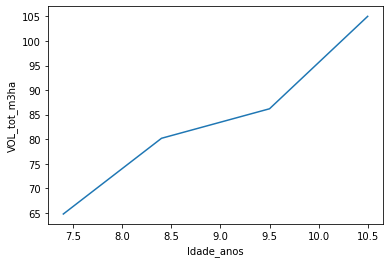

In [ ]:
sns.lineplot(data=talhao29C_mens_anual, x="Idade_anos", y="VOL_tot_m3ha")

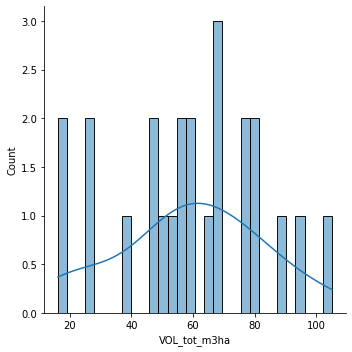

In [ ]:
sns.displot(inventario2021[('VOL_tot_m3ha')], kde=True, bins=30)

Cruzamento de gráficos de hisitograma, normalidade e regressão.

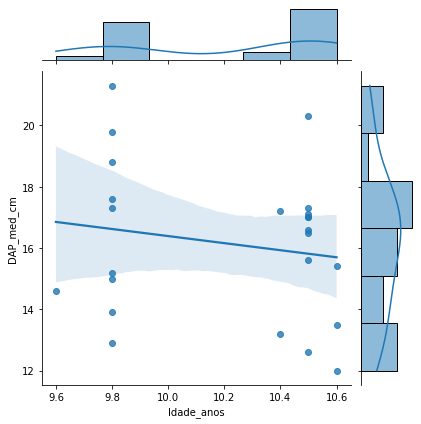

In [ ]:
dap_2021 = sns.jointplot(x='Idade_anos', y='DAP_med_cm',data=inventario2021,kind='reg')
dap_2021

Qual foi o diâmetro máximo no inventário de 2021?

In [ ]:
inventario2021.DAP_med_cm.max()

21.3

Em qual talhão encontra-se o diâmetro máximo?

In [ ]:
inventario2021[(inventario2021['DAP_med_cm'] == 21.3)]

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
27,2021-09-30,019,26.67,9.8,21.3,54.7,13.7


Qual foi o diâmetro minimo encontrado no inventário 2021?

In [ ]:
inventario2021.DAP_med_cm.min()

12.0

Em qual talhão encontra-se o diâmetro minimo?

In [ ]:
inventario2021[(inventario2021['DAP_med_cm'] == 12.0)]

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
15,2021-09-30,005,31.35,10.6,12.0,16.2,8.5


Qual foi o diâmetro máximo encontrado no inventário 2021?

In [ ]:
inventario2021.VOL_tot_m3ha.max()

105.0

Em qual talhão encontra-se o diâmetro máximo?

In [ ]:
inventario2021[(inventario2021['VOL_tot_m3ha'] == 105.0)]

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
98,2021-09-30,29C,10.13,10.5,20.3,105.0,13.9


Qual é o menor volume (m³/ha)?

In [ ]:
inventario2021.VOL_tot_m3ha.min()

16.2

Em qual talhão temos o menor volume (m³/ha)?

In [ ]:
inventario2021[(inventario2021['VOL_tot_m3ha'] == 16.2)]

,Data_medicao,ID_talhao,Area_talhao_ha,Idade_anos,DAP_med_cm,VOL_tot_m3ha,ALT_tot_m
3,2021-09-30,001,23.95,10.5,12.6,16.2,9.1
15,2021-09-30,005,31.35,10.6,12.0,16.2,8.5


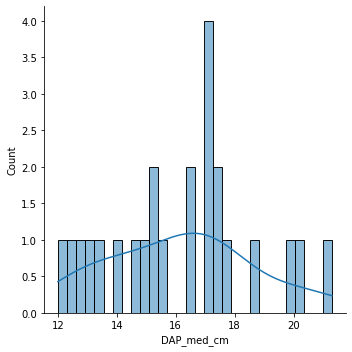

In [ ]:
sns.displot(inventario2021[('DAP_med_cm')], kde=True, bins=30)
#fig.savefig("figura.pdf", dpi=200)
#sns.distplot(tips[('total_bill')], kde=False, bins=30)

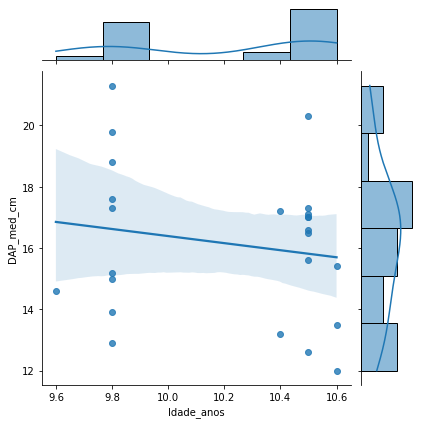

In [ ]:
#plt.style.use('dark_background')
DAP_idade_anos = sns.jointplot(x='Idade_anos', y='DAP_med_cm',data=inventario2021,kind='reg')
DAP_idade_anos.savefig("figura.pdf", dpi=200)

Exemplo de gráficos Boxplot.

<Figure size 1008x432 with 0 Axes>

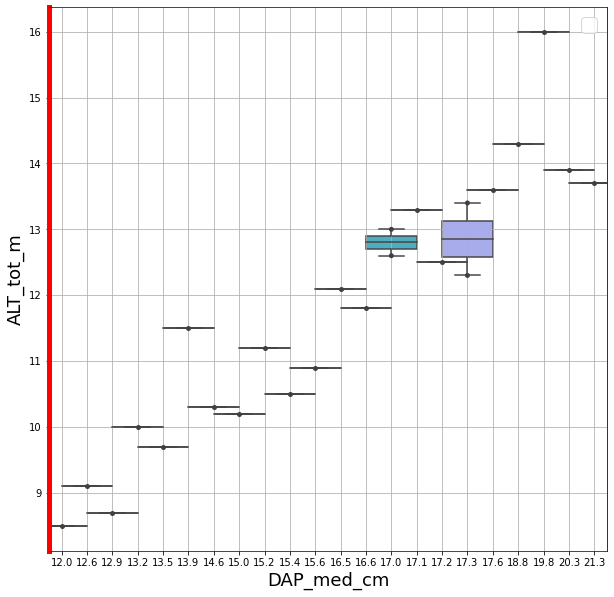

In [ ]:
plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(10,10)) # primeiro temos que criar a área de plotagem

boxdap_alt = sns.boxplot(data=inventario2021,x='DAP_med_cm', y='ALT_tot_m',width=2)
boxdap_alt = sns.swarmplot(x="DAP_med_cm", y="ALT_tot_m", data=inventario2021, color=".25", size=5)
plt.xlabel('DAP_med_cm', fontsize = 18)
plt.ylabel('ALT_tot_m', fontsize = 18)
plt.legend(fontsize = 20)

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(5)
plt.grid()